<a href="https://colab.research.google.com/github/FelipeaACamargo/regressao-linear-sorvete-temperatura/blob/main/Regressao_Sorvete_Temperatura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aprendizado Supervisionado - Regressão Linear**

# **Importação das Bibliotecas**

**bibliotecas necessárias:**

- *numpy* (np): Biblioteca para operações matemáticas, principalmente arrays e funções matemáticas.

- *pandas* (pd): Biblioteca para manipulação de dados em tabelas (DataFrame).

- *matplotlib.pyplot* (plt): Biblioteca para criar gráficos e visualizações.

- *train_test_split*: Função para dividir dados em treino e teste.

- *LinearRegression*: Classe usada para criar o modelo de regressão linear.

- *mean_absolute_error*, *mean_squared_error*, *r2_score*: Funções para avaliar a performance do modelo.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Preparação dos Dados

**Trabalharemos com dados fictícios, para aplicar didáticamente a Regressão Linear.**

- Criar um dicionário com dados de exemplo: '*temperatura*' (em graus) e '*sorvete*' (quantidade vendida).

- Transformar o dicionário em um *DataFrame* do pandas (df), que facilita a manipulação desses dados em formato de tabela.




---

| Temperatura | Sorvete |
|-------------|---------|
| 51          | 1       |
| 52          | 0       |
| 67          | 14      |
| 65          | 14      |
| 70          | 23      |
| 69          | 20      |
| 72          | 23      |
| 75          | 26      |
| 73          | 22      |
| 81          | 30      |
| 78          | 26      |
| 83          | 36      |

In [11]:
# Criando Dicionário
data = {
    'temperatura': [51, 52, 67, 65, 70, 69, 72, 75, 73, 81, 78, 83],
    'sorvete':     [1,   0, 14, 14, 23, 20, 23, 26, 22, 30, 26, 36]
}
# Transformando em um dataframe para manipulações
df = pd.DataFrame(data)

## Separação de Variáveis

Separando as colunas em variáveis:

- **X:** Dados de entrada (variável independente, aqui 'temperatura').

- **y:** Saída/resultado (variável dependente, aqui 'sorvete').

In [12]:
# Separar variáveis independentes (X) e dependentes (y)
X = df[['temperatura']]
y = df['sorvete']

## Divisão em Treinamento e Teste

Divideremos os dados em dois grupos:

- 75% para treino (X_train, y_train)

- 25% para teste (X_test, y_test)

O parâmetro *random_state* garante que a divisão seja sempre a mesma ao rodar o código outra vez.

In [13]:
# Divisão dos Dados em Conjuntos de Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 3)

## Criação e Treinamento do Modelo


Criaremos um modelo de regressão linear chamado *model*.

- Treinaremos esse modelo com os dados de treino (X_train, y_train).

In [14]:
# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Previsão dos Dados de Teste

Faremos as **previsões** usando o modelo treinado nos dados de teste (X_test), salvando os resultados em y_pred.

In [15]:
# Fazer previsões
y_pred = model.predict(X_test)

## Avaliação do Modelo - Métricas

- MAE: Calcula e mostra o erro absoluto médio (MAE), que mede o erro entre os valores reais e previstos.

$$ \boxed{MAE =  \dfrac{1}{n}\cdot \sum_{i = 1}^{n}|y_i - \hat{y}_i|}$$
    em que

  -  $n$ é o número de amostras;
  -  $y$ é o valor real para cada amostra;
  - $\hat{y}$ é o valor previsto pelo modelo para cada amostra.


---

- MSE: Calcula e mostra o Erro Quadrático Médio (MSE), que penaliza mais erros grandes.

 $$\boxed{EQM =  \dfrac{1}{n}\cdot \sum_{i = 1}^{n}\left(y_{i} - \hat{y_{i}}\right)^{2}}$$ em que

  - $n$ é o número de amostras;
  - $y$ é o valor real para cada amostra;
  - $\hat{y}$ é o valor previsto pelo modelo para cada amostra.

---



- RMSE: Calcula e mostra a raiz quadrada do MSE (RMSE), interpretada como o erro médio na mesma unidade dos dados originais.

$$  \boxed{RMSE =  \sqrt{\dfrac{1}{n}\cdot \sum_{i = 1}^{n}\left(y_{i} - \hat{y_{i}}\right)^{2}} = \sqrt{EQM}}$$ em que

  - $n$ é o número de amostras;
  - $y$ é o valor real para cada amostra;
  - $\hat{y}$ é o valor previsto pelo modelo para cada

---


- R2: Calcula e mostra o $R^2$ (coeficiente de determinação) que indica o quanto o modelo explica dos dados (varia de 0 a 1).

$$ \boxed{R^{2} = 1 - \dfrac{\displaystyle{\sum_{i = 1}^{n}}(y_i - \hat{y_i})^2}{\displaystyle{\sum_{i = 1}^{n}}(y_i - \bar{y_i})^2}} $$



---



In [16]:
# Avaliando o modelo
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

print(f"O Erro Absoluto Médio (MAE) é {MAE:.3f},\nO Erro Quadrático Médio (MSE) é {MSE:.3f},\nA Raiz Quadrada do MSE (RMSE) é {RMSE:.3f}\nE o Coeficiente de Determinação R² é {R2:.3f}")


O Erro Absoluto Médio (MAE) é 1.876,
O Erro Quadrático Médio (MSE) é 4.776,
A Raiz Quadrada do MSE (RMSE) é 2.186
E o Coeficiente de Determinação R² é 0.954


## Visualização dos Resultados

Criaremos um gráfico com as seguintes informações:

- Pontos azuis: dados usados para treinar o modelo.

- Linha vermelha: linha de regressão treinada.

- Pontos verdes: dados reais do conjunto de teste.

- Pontos laranja: previsões feitas pelo modelo para os dados de teste.

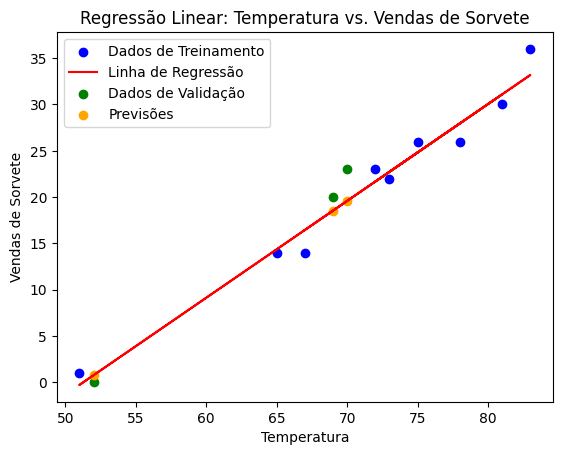

In [17]:
# Visualizar os resultados
plt.scatter(X_train, y_train, color='blue', label='Dados de Treinamento')
plt.plot(X_train, model.predict(X_train), color='red', label='Linha de Regressão')
plt.scatter(X_test, y_test, color='green', label='Dados de Validação')
plt.scatter(X_test, y_pred, color='orange', label='Previsões')

plt.xlabel('Temperatura')
plt.ylabel('Vendas de Sorvete')
plt.title('Regressão Linear: Temperatura vs. Vendas de Sorvete')
plt.legend()
plt.show()
